# cdpi : Causal Discovery Python Implementation

##  DAG Pattern_visualization

### class pattern

In [ ]:
pip install cdpi -q

In [ ]:
from cdpi import pattern

In [ ]:
from collections import deque
from itertools import combinations, chain
from collections import defaultdict
import numpy as np

#### Visualization methods

The following two steps are required for 'pretty' graph visualization.


1. Assign the 'pretty' position to each vertex considering the edge and link.
2. Draw vertex, edge, and link according to the position.

For step 1, I used Force-Directed Algorithm.



##### force_directed_algorithm

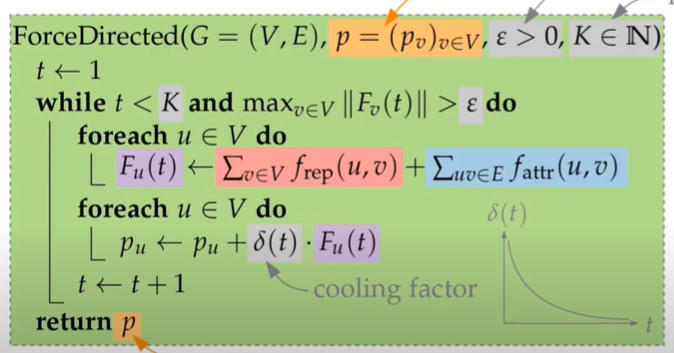

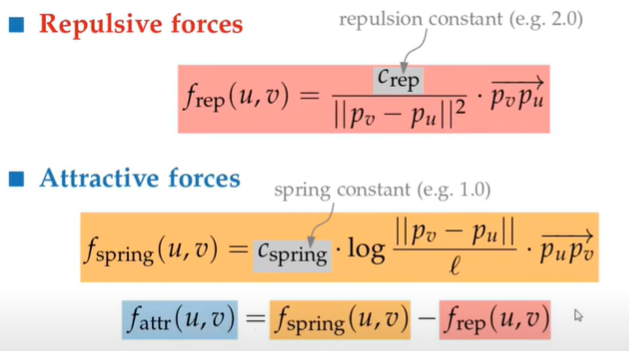

[img src](https://www.youtube.com/watch?v=WWm-g2nLHds)

In [ ]:
def force_directed_algorithm(self, pos, iterations:int = 100, ideal_length = 1):
    c_rep = 2
    c_spr = 1
    t = 1
    
    for i in range(iterations):
        # Calculate repulsion force
        repulsion = {vertex: np.zeros(2) for vertex in self.vertex}
        for u, v in combinations(self.vertex, 2):
            delta = pos[u] - pos[v]
            dist = np.sqrt(delta.dot(delta))
            if dist > 0:
                rep = delta * c_rep / dist**3
                repulsion[u] += rep
                repulsion[v] -= rep
        
        # Calculate attraction force
        attraction = {vertex: np.zeros(2) for vertex in self.vertex}
        for u in self.vertex:
            for v in list(self.child[u].keys()) + list(self.link[u].keys()):
                delta = pos[u] - pos[v]
                dist = np.sqrt(delta.dot(delta))
                if dist > 0:
                    attr = c_spr * delta * np.log(dist/ideal_length)/dist - delta * c_rep / dist**3
                    attraction[u] -= attr
                    attraction[v] += attr
                
        
        # Calculate total force
        force = {vertex: attraction[vertex] + repulsion[vertex] for vertex in self.vertex}
        
        # Update vertex pos
        for vertex in self.vertex:
            delta = force[vertex]
            dist = np.sqrt(delta.dot(delta))
            pos[vertex] += delta * min(dist, t) / dist
        
        t *= (1 - i / iterations)
    
    return pos

pattern.force_directed_algorithm = force_directed_algorithm

##### draw_by_pos

**Parameter**


*   pos : Dictionary where the positions of vertices are stored. The key of *pos* is vertices (str) and the item is coordinates of vertices (np.array)



In [ ]:
import matplotlib.pyplot as plt

def draw_by_pos(self, pos:dict):
    fig, ax = plt.subplots()

    # Draw Edges
    for pa in self.child.keys():
        for ch in self.child[pa].keys():
            x, y = pos[pa]
            dx, dy = (pos[ch] - pos[pa])/10 * 8
            plt.arrow(x, y, dx, dy, length_includes_head = True, width = 0.1, color = 'black')
    
    # Draw Links
    pairs = combinations(list(self.link.keys()), 2)
    for v1 in self.link.keys():
        for v2 in self.link[v1].keys():
            x, y = pos[v1]
            dx, dy = pos[v2] - pos[v1]
            plt.arrow(x, y, dx, dy, width = 0.1, color = 'black')
    
    # Draw Vertex and its name
    for v, p in pos.items():
        ax.add_patch(plt.Circle(p, 0.5, color = 'lightsteelblue'))
        if len(v) == 1:plt.text(p[0], p[1], v, fontsize = 16, ha='center', va='center')
        else : plt.text(p[0], p[1], v, fontsize = 12, ha='center', va='center')

    self.pos = pos

pattern.draw_by_pos = draw_by_pos

##### draw

In [ ]:
def draw(self):
    # Initial position setting
    max_int =  int(np.sqrt(2 * len(self.vertex))) + 1
    loc = list(combinations(list(range(max_int + 1)), 2))
    vertices = list(self.vertex)
    pos = dict()
    for i, v in enumerate(vertices):
      pos[v] = np.array(loc[i]).astype('float64')
    
    # Find pos
    pos = self.force_directed_algorithm(pos)

    # Draw graph by pos
    self.draw_by_pos(pos)

pattern.draw = draw

#### Example

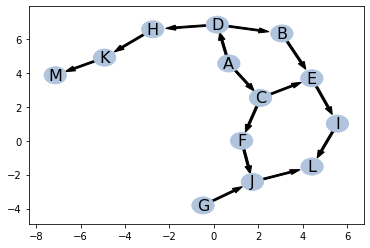

In [ ]:
ptn = pattern()
ptn.add_edges([
    ('A', 'D'),
    ('A', 'C'),
    ('D', 'B'),
    ('B', 'E'),
    ('C', 'E'),
    ('C', 'F'),
    ('D', 'H'),
    ('E', 'I'),
    ('F', 'J'),
    ('H', 'K'),
    ('I', 'L'),
    ('J', 'L'),
    ('G', 'J'),
    ('K', 'M')
])
ptn.draw()

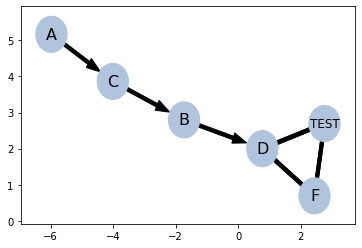

In [ ]:
ptn = pattern()
ptn.add_edges([
    ('A', 'C'),
    ('C', 'B'),
    ('B', 'D'),
])
ptn.add_links([
    ('D', 'TEST'),
    ('D', 'F'),
    ('TEST', 'F'),
])
ptn.draw()